An Attempt...

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')
path = "/content/drive/MyDrive/Rochester/SICSS 2024/SICSS Datasets/"

# features = ["lookupzip", "inputstate", "birthyr", "gender4", "educ", "race", "hispanic", "industry", "employ", "houseincome"]
features = ["inputstate", "birthyr", "gender4", "educ", "race", "hispanic", "industry", "employ", "houseincome", "numchildren"]

# data = pd.read_csv(path+"CES_With_Rankings.csv")
data = pd.read_csv(path+"CES_indicator.csv")
features = []

for item in data:
  if "CC22_300b" not in item and item != "Unnamed: 0":
    features.append(item)

print(features)

interest = []

for item in data:
  if "CC22_300b" in item:
    interest.append(item)

print(interest[-1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['inputstate_26', 'inputstate_25', 'inputstate_42', 'inputstate_9', 'inputstate_24', 'inputstate_33', 'inputstate_13', 'inputstate_48', 'inputstate_37', 'inputstate_22', 'inputstate_45', 'inputstate_53', 'inputstate_23', 'inputstate_51', 'inputstate_18', 'inputstate_6', 'inputstate_21', 'inputstate_36', 'inputstate_41', 'inputstate_5', 'inputstate_8', 'inputstate_12', 'inputstate_46', 'inputstate_47', 'inputstate_31', 'inputstate_4', 'inputstate_49', 'inputstate_39', 'inputstate_20', 'inputstate_27', 'inputstate_55', 'inputstate_54', 'inputstate_30', 'inputstate_40', 'inputstate_16', 'inputstate_19', 'inputstate_17', 'inputstate_34', 'inputstate_35', 'inputstate_29', 'inputstate_28', 'inputstate_44', 'inputstate_32', 'inputstate_11', 'inputstate_2', 'inputstate_1', 'inputstate_15', 'inputstate_38', 'inputstate_10', 'inputstate_56', 'inputstate_50', 'birthyr_1

K Nearest Neighbor

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = data[features].values
y = data[interest].values
# y = data["CC22_300b_1"].values

# for i in range(len(y)):
#   if y[i] == 2:
#     y[i] = 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

neigh = KNeighborsClassifier(
    n_neighbors=300,
    weights="distance"
    )
neigh.fit(X_train, y_train)

print(neigh.predict(X_test))
print(neigh.score(X_test, y_test))


# plt.scatter(X_train[:,0], y_train)
# plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.032164309242394884


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# X = supervised[["0", "1", "2", "3"]].values
# y = supervised['target'].values

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.3, random_state=42
#     )

clf = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=1.0,
    max_depth=1,
    random_state=0).fit(X_train, y_train)

clf.score(X_test, y_test)

ValueError: y should be a 1d array, got an array of shape (12042, 8) instead.

CC22_300b_1_1.0 0.6386886770518484


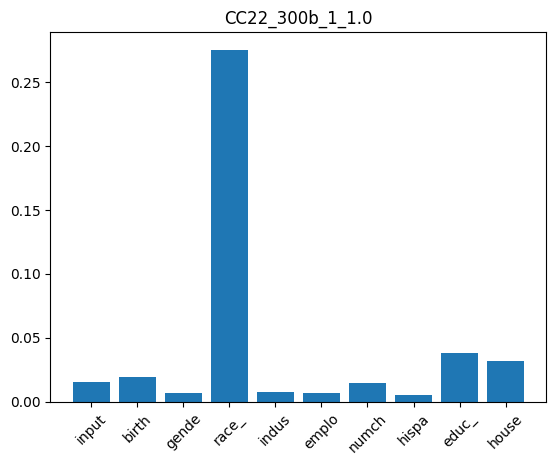

CC22_300b_1_2.0 0.6403162055335968


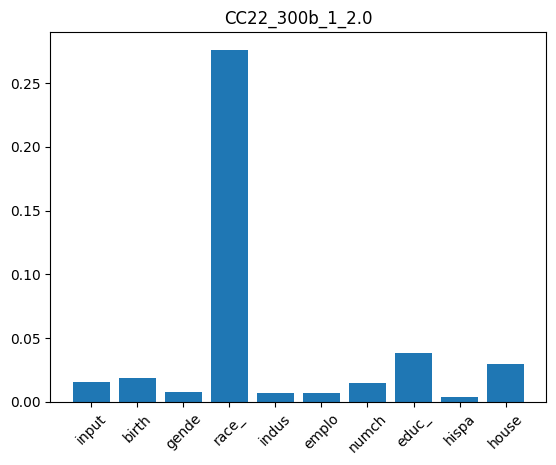

CC22_300b_2_2.0 0.6458963031853058


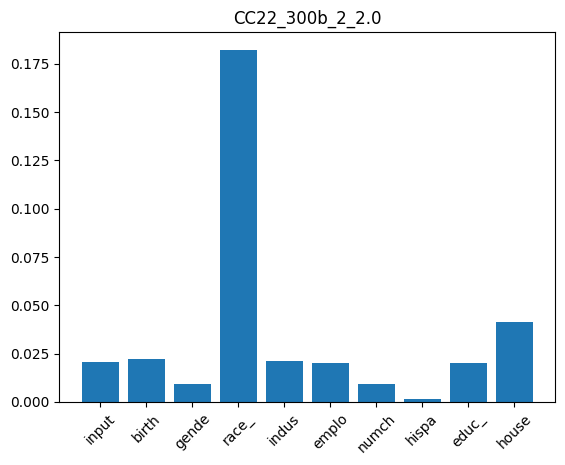

CC22_300b_2_1.0 0.6458963031853058


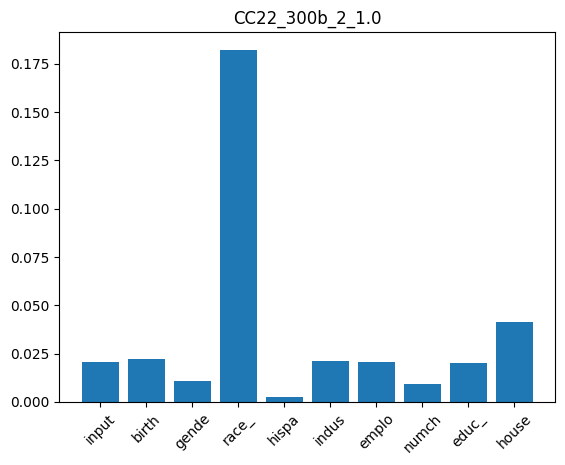

CC22_300b_3_2.0 0.6231109044408277


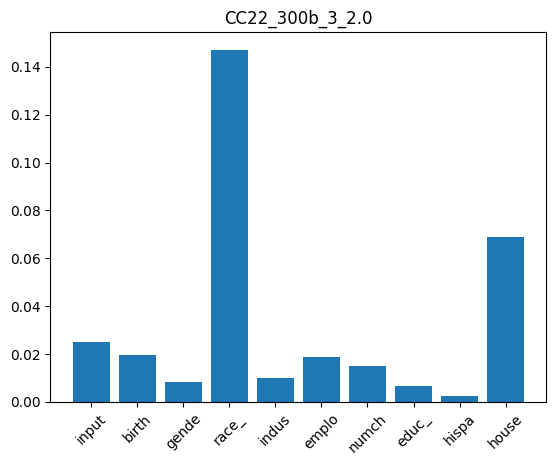

CC22_300b_3_1.0 0.6231109044408277


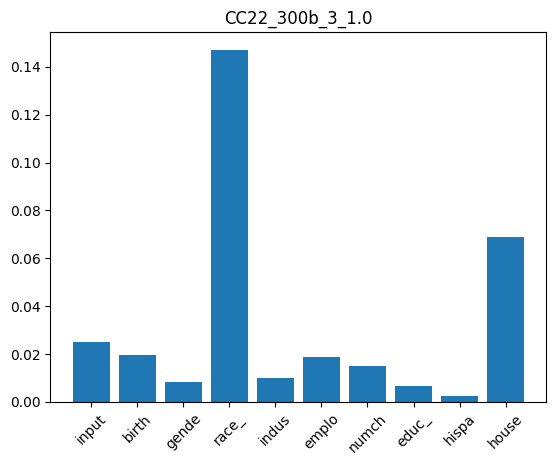

CC22_300b_4_1.0 0.6991397349453615


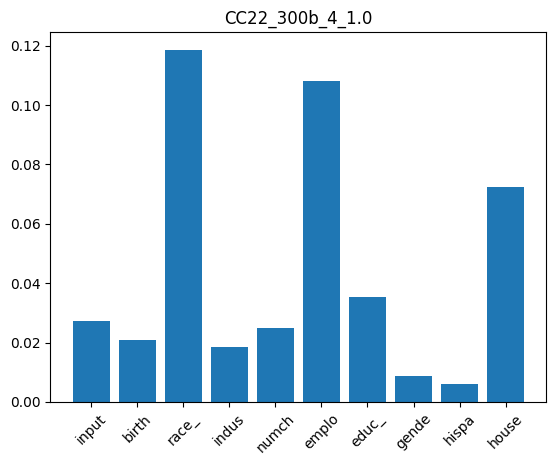

CC22_300b_4_2.0 0.6991397349453615


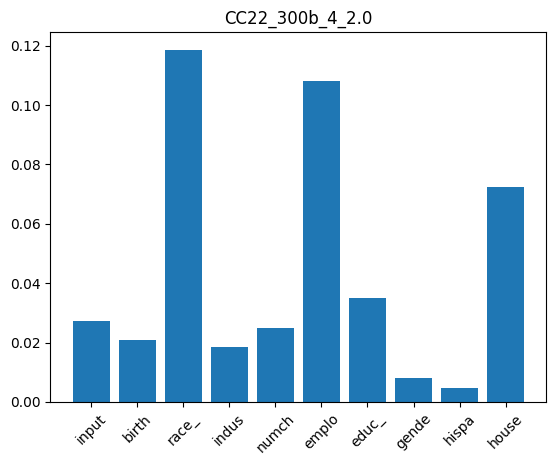

CC22_300b_5_2.0 0.6656591490351081


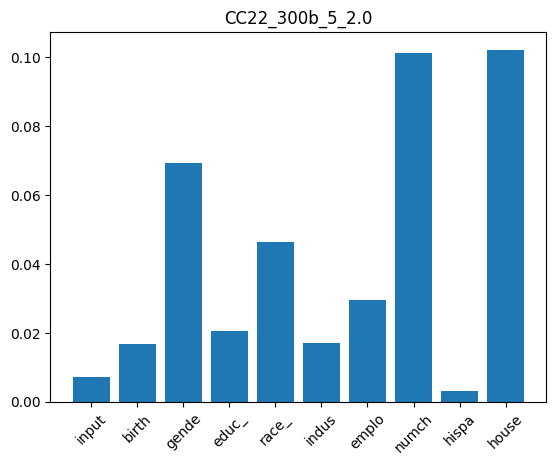

CC22_300b_5_1.0 0.6656591490351081


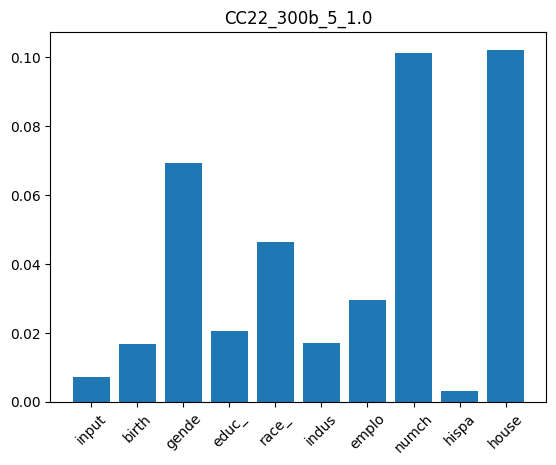

CC22_300b_6_2.0 0.7216926296210183


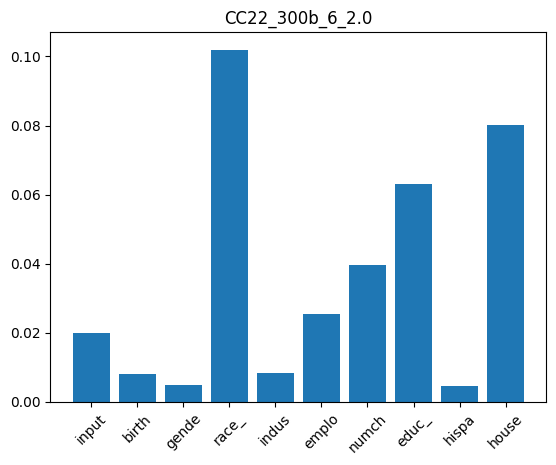

CC22_300b_6_1.0 0.7216926296210183


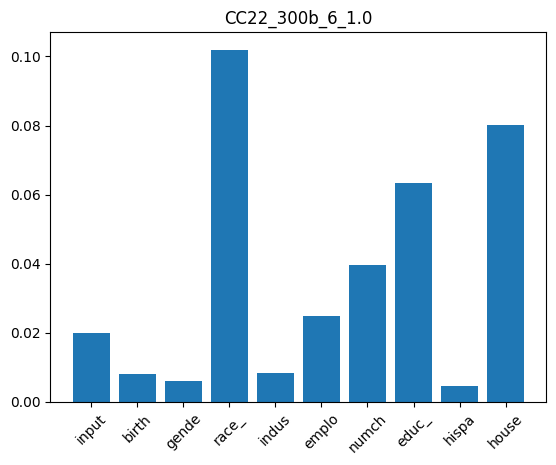

CC22_300b_7_2.0 0.8349221111369449


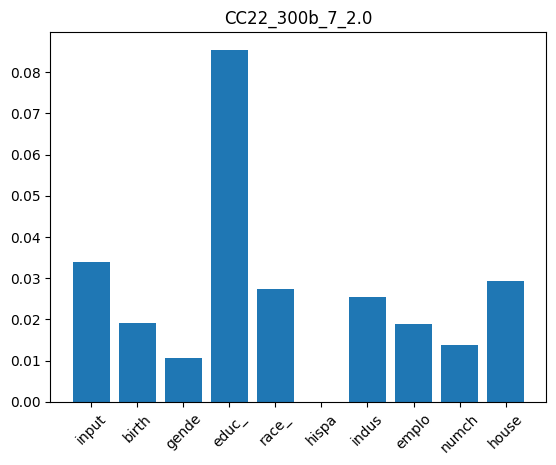

CC22_300b_7_1.0 0.8349221111369449


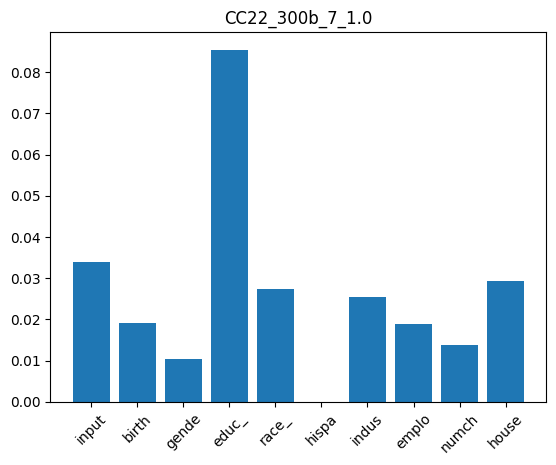

CC22_300b_8_2.0 0.8846779818646826


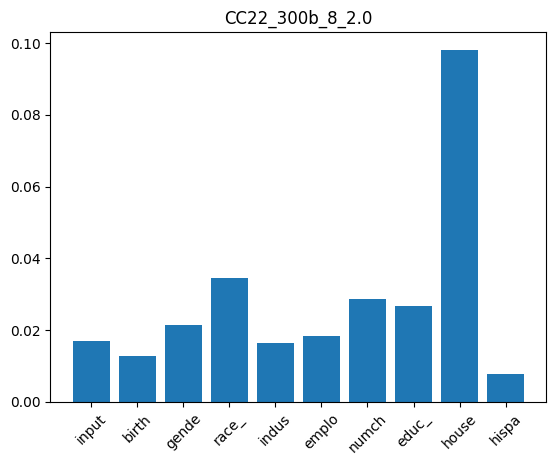

CC22_300b_8_1.0 0.8849104859335039


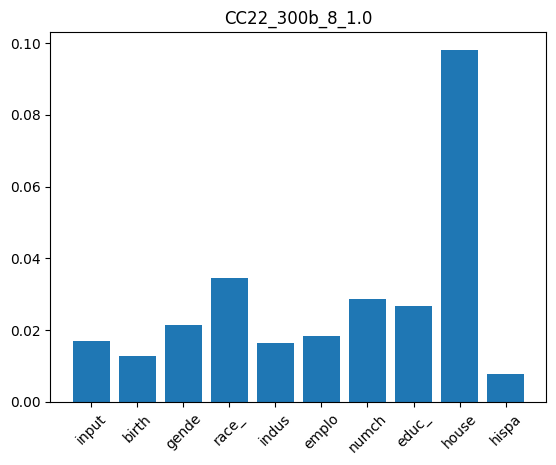

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

data = pd.read_csv(path+"CES_indicator.csv")
interest = []
for item in data:
  if "CC22_300b" in item:
    interest.append(item)

features = []
for item in data:
  if "CC22_300b" not in item and item != "Unnamed: 0":
    features.append(item)

x_values = features

X = data[x_values].values
y_values = interest

for i in range(len(y_values)):
  y = data[y_values[i]].values

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.25, random_state=42
      )

  clf = GradientBoostingClassifier(
      random_state=123
  ).fit(X_train, y_train)

  print(y_values[i], clf.score(X_test, y_test))

  new_features = []
  new_importance = []
  current = ""
  count = -1

  for m in range(len(x_values)):
    if x_values[i][0:5] != current:
      count += 1
      new_features.append(x_values[m][0:5])
      new_importance.append(clf.feature_importances_[m])
    else:
      new_importance[count] += clf.feafture_importances_[m]

  paired_arrays = list(zip(new_importance, new_features))

  # Sort the paired elements based on the elements of the first array
  sorted_pairs = sorted(paired_arrays, key=lambda x: x[0])

  # Unzip the sorted pairs back into two separate arrays
  sorted_features, sorted_x = zip(*sorted_pairs)

  plt.bar(sorted_x, sorted_features)
  plt.title(y_values[i])
  plt.xticks(rotation=45)
  plt.show()

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Model Accuracy: 0.6433387584282725


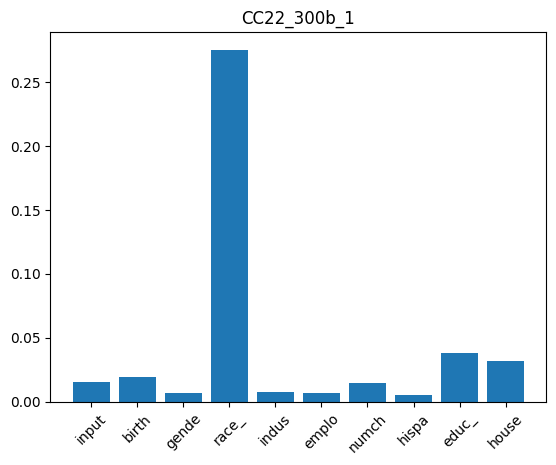

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}


data = pd.read_csv(path+"CES_indicator_300bunsplit.csv")
interest = []
for item in data:
  if "CC22_300b" in item:
    interest.append(item)

x_values = features

X = data[x_values].values
y_values = interest


for i in range(len(y_values)):
  y = data[y_values[i]].values

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.25, random_state=42
      )

  clf = GradientBoostingClassifier(
      random_state=123
  ).fit(X_train, y_train)

  grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  best_model = grid_search.best_estimator_

  # Make predictions on the test set using the best model
  y_pred_best = best_model.predict(X_test)

  # Evaluate the best model
  accuracy_best = accuracy_score(y_test, y_pred_best)

  print("Best Parameters:", best_params)
  print(f"Best Model Accuracy: {accuracy_best}")

  new_features = []
  new_importance = []
  current = ""
  count = -1

  for m in range(len(x_values)):
    if x_values[i][0:5] != current:
      count += 1
      new_features.append(x_values[m][0:5])
      new_importance.append(clf.feature_importances_[m])
    else:
      new_importance[count] += clf.feafture_importances_[m]

  paired_arrays = list(zip(new_importance, new_features))

  # Sort the paired elements based on the elements of the first array
  sorted_pairs = sorted(paired_arrays, key=lambda x: x[0])

  # Unzip the sorted pairs back into two separate arrays
  sorted_features, sorted_x = zip(*sorted_pairs)

  plt.bar(sorted_x, sorted_features)
  plt.title(y_values[i])
  plt.xticks(rotation=45)
  plt.show()

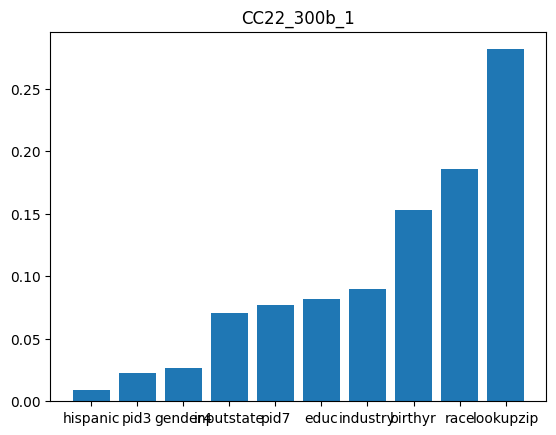

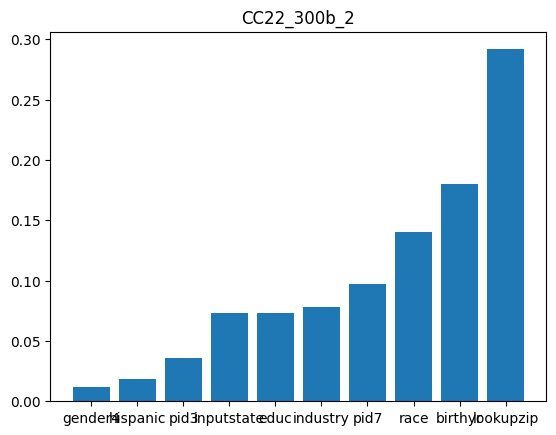

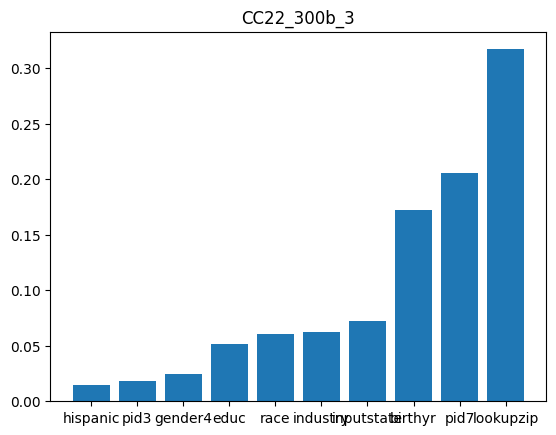

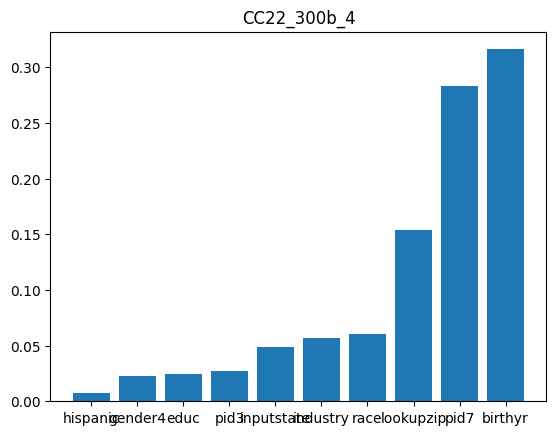

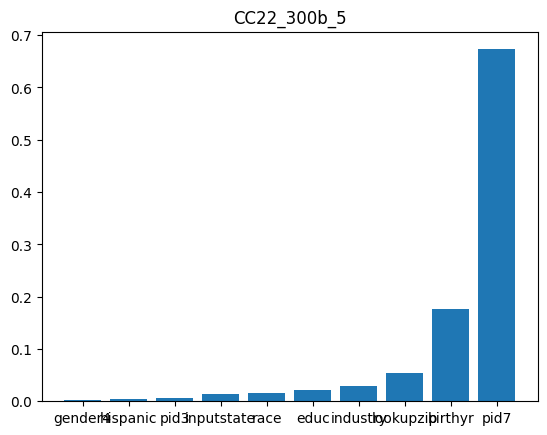

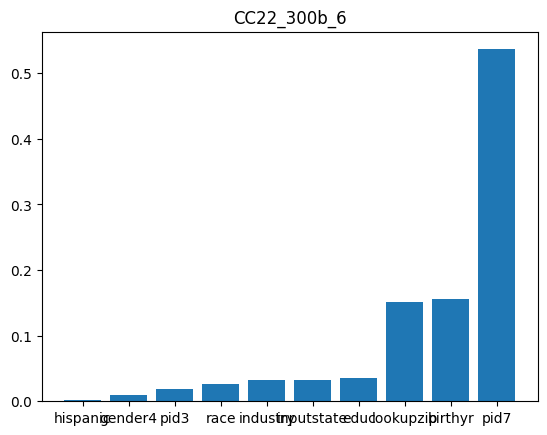

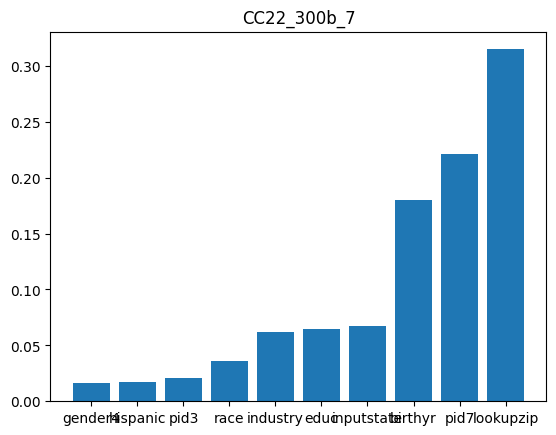

{'CC22_300b_1': 0.6131090487238979, 'CC22_300b_2': 0.6160092807424594, 'CC22_300b_3': 0.5893271461716937, 'CC22_300b_4': 0.6403712296983759, 'CC22_300b_5': 0.7853828306264501, 'CC22_300b_6': 0.6682134570765661, 'CC22_300b_7': 0.765661252900232}


In [ ]:
politics_data = pd.read_csv(path+"CES_Politics_With_Rankings.csv")

from sklearn.ensemble import GradientBoostingClassifier

x_values = ["lookupzip", "inputstate", "birthyr", "gender4", "educ", "race", "hispanic", "industry", "pid3", "pid7"]

X = politics_data[x_values].values
y_values = ["CC22_300b_1", "CC22_300b_2", "CC22_300b_3", "CC22_300b_4", "CC22_300b_5", "CC22_300b_6", "CC22_300b_7"]

performance = {}

for i in range(len(y_values)):
  y = politics_data[y_values[i]].values

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.25, random_state=42
      )

  clf = GradientBoostingClassifier(
      random_state=123,
      n_estimators=150
  ).fit(X_train, y_train)

  performance[y_values[i]] = clf.score(X_test, y_test)

  paired_arrays = list(zip(clf.feature_importances_, x_values))

  # Sort the paired elements based on the elements of the first array
  sorted_pairs = sorted(paired_arrays, key=lambda x: x[0])

  # Unzip the sorted pairs back into two separate arrays
  sorted_features, sorted_x = zip(*sorted_pairs)

  plt.bar(sorted_x, sorted_features)
  plt.title(y_values[i])
  plt.show()

print(performance)

Logistic Regression

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

data = pd.read_csv(path+"CES_With_Rankings.csv")

x_values = features

X = data[x_values].values
y_values = ["CC22_300b_1", "CC22_300b_2", "CC22_300b_3", "CC22_300b_4", "CC22_300b_5", "CC22_300b_6", "CC22_300b_7"]

y = y_values

for i in range(len(y_values)):
  y = data[y_values[i]].values

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.25, random_state=42
      )

  # clf = GradientBoostingClassifier(
  #     random_state=123
  # ).fit(X_train, y_train)

  # print(y_values[i], clf.score(X_test, y_test))

  # paired_arrays = list(zip(clf.feature_importances_, x_values))

  # # Sort the paired elements based on the elements of the first array
  # sorted_pairs = sorted(paired_arrays, key=lambda x: x[0])

  # # Unzip the sorted pairs back into two separate arrays
  # sorted_features, sorted_x = zip(*sorted_pairs)

  # plt.bar(sorted_x, sorted_features)
  # plt.title(y_values[i])
  # plt.show()

  clf = LogisticRegression().fit(X_train, y_train)

  print(clf.predict(X_test))

  print(clf.score(X_test, y_test))

  print(clf.coef_)

NameError: name 'pd' is not defined

In [ ]:
politics_data = pd.read_csv(path+"CES_Politics_With_Rankings.csv")

from sklearn.ensemble import GradientBoostingClassifier

x_values = ["lookupzip", "inputstate", "birthyr", "gender4", "educ", "race", "hispanic", "industry", "pid3", "pid7"]

X = politics_data[x_values].values
y_values = ["CC22_300b_1", "CC22_300b_2", "CC22_300b_3", "CC22_300b_4", "CC22_300b_5", "CC22_300b_6", "CC22_300b_7"]

for i in range(len(y_values)):
  y = data[y_values[i]].values

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.20, random_state=42
      )

  # clf = GradientBoostingClassifier(
  #     random_state=123
  # ).fit(X_train, y_train)

  # print(y_values[i], clf.score(X_test, y_test))

  # paired_arrays = list(zip(clf.feature_importances_, x_values))

  # # Sort the paired elements based on the elements of the first array
  # sorted_pairs = sorted(paired_arrays, key=lambda x: x[0])

  # # Unzip the sorted pairs back into two separate arrays
  # sorted_features, sorted_x = zip(*sorted_pairs)

  # plt.bar(sorted_x, sorted_features)
  # plt.title(y_values[i])
  # plt.show()

  clf = LogisticRegression().fit(X_train, y_train)

  print(clf.predict(X_test))

  print(clf.score(X_test, y_test))

  print(clf.coef_)

[0. 0. 0. ... 0. 0. 0.]
0.5750543872371283
[[ 1.94093250e-07 -2.84281899e-06 -1.42440740e-04 -9.51805446e-08
  -6.00979193e-07  2.13805755e-08 -1.68309732e-07 -8.61613523e-07
  -2.14312972e-07 -4.98607465e-07]]
[2. 2. 2. ... 2. 2. 2.]
0.5736040609137056
[[-1.21765373e-08  3.43180255e-06  1.63210538e-04  1.32527467e-07
   5.47096494e-07  3.02213941e-08  1.70545162e-07  8.98924908e-07
   2.94447469e-07  7.15342131e-07]]
[2. 2. 2. ... 2. 2. 1.]
0.5989847715736041
[[ 5.01755353e-07  1.98620848e-03 -2.91847090e-04  8.16312235e-04
   1.60286757e-02 -8.78218576e-03  3.74926193e-04  2.98147236e-02
   2.62866522e-02  1.10515127e-01]]
[2. 2. 2. ... 2. 2. 2.]
0.5692530819434373
[[ 9.01472379e-07  9.96538722e-03 -6.68007427e-05  1.69724845e-04
  -8.65617038e-04 -1.33321948e-03  1.76199456e-04 -2.43276168e-04
   1.69799802e-03  7.21027653e-03]]
[2. 1. 1. ... 2. 1. 2.]
0.7686729514140682
[[ 1.11890821e-06  3.15141923e-03  6.64939889e-04  2.36074046e-02
   6.95716637e-02 -5.18840934e-03  5.50400372e-

Cosine Similarity

In [ ]:
from numpy.linalg import norm

data = pd.read_csv(path+"CES_With_Rankings.csv")

x_values = features

X = data[x_values].values
y_values = data[["CC22_300b_1", "CC22_300b_2", "CC22_300b_3", "CC22_300b_4", "CC22_300b_5", "CC22_300b_6", "CC22_300b_7"]].values
y = y_values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

test = X_test[0]

avg = []

for j in range(len(X_test)):
  top1 = 0
  top2 = 0
  top3 = 0

  p1 = 0
  p2 = 0
  p3 = 0

  for i in range(len(X_train)):
    cosine = np.dot(X_test[j],X_train[i])/(norm(X_test[j])*norm(X_train[i]))
    if cosine > top1:
      top3 = top2
      top2 = top1
      top1 = cosine

      p3 = p2
      p2 = p1
      p1 = i

  validity = 0
  cosine = np.dot(y_test[j],y_train[p1])/(norm(y_test[j])*norm(y_train[p1]))
  for m in range(len(y_test[j])):
    if m == 1:
      if y_train[p1][m] == 1:
        validity += 1
      if y_train[p2][m] == 1:
        validity += 1
      if y_train[p3][m] == 1:
        validity += 1
  # print(validity/7)

  avg.append(validity)

  if j % 100 == 0:
    print(j, sum(avg)/len(avg))

print(sum(avg)/len(avg))

avg = sorted(avg)
print(avg[int(len(avg)/2)])
  # time.sleep(5)

  # print(np.dot(y_test[j],X_train[p1])/(norm(y_test[j])*norm(X_train[p1])))


# print(top1, top2, top3)

#           # 0 0 0 0 1 0 0

# print(p1) # 0 0 0 1 0 1 0
# print(p2) # 0 0 0 0 1 0 0
# print(p3) # 1 0 0 0 0 1 0

0 1.0
100 1.3762376237623761
200 1.3233830845771144
300 1.2890365448504983
400 1.3067331670822944
500 1.3053892215568863
600 1.281198003327787
700 1.2624821683309557
800 1.2596754057428214
900 1.2630410654827968
1000 1.2477522477522478
1100 1.2415985467756585
1200 1.241465445462115
1300 1.250576479631053
1400 1.2519628836545325
1500 1.2544970019986676
1600 1.2679575265459089
1700 1.265138154027043
1800 1.2626318711826763
1900 1.2614413466596528
2000 1.2613693153423289
1.2547215496368038
1


In [ ]:
current = -1
count = 0
for i in range(len(avg)):
  if avg[i] != current:
    print(current, count)
    print(count/len(avg))
    count = 0
    current = avg[i]
  else:
    count += 1

-1 0
0.0
0 414
0.20019342359767892
1 798
0.3858800773694391
2 649
0.31382978723404253


Type: <class 'list'>
CC22_300b_1_1 0.8552879733062527


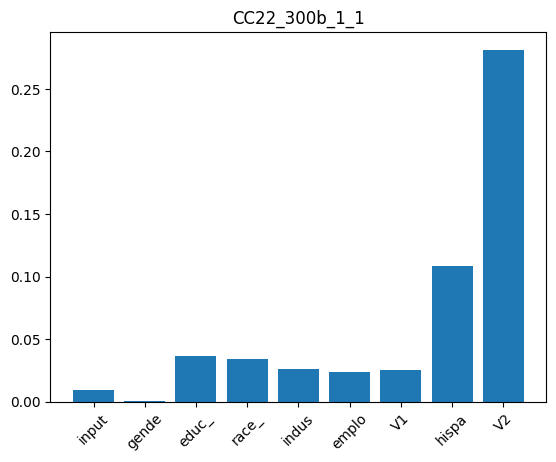

CC22_300b_1_2 0.7748440446830117


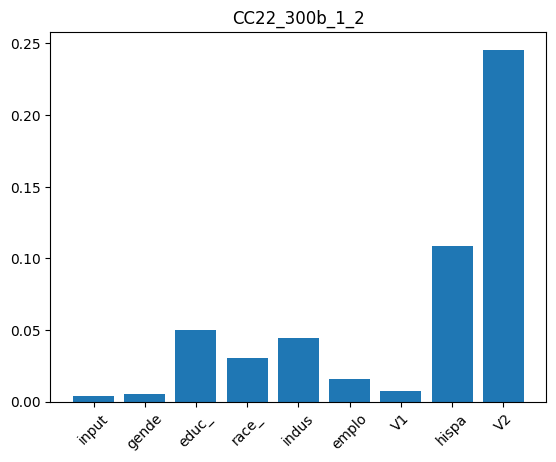

CC22_300b_1_NA 0.6597997968954011


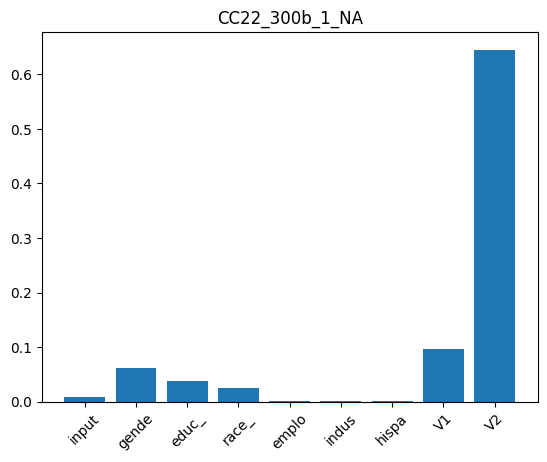

CC22_300b_2_2 0.8672566371681416


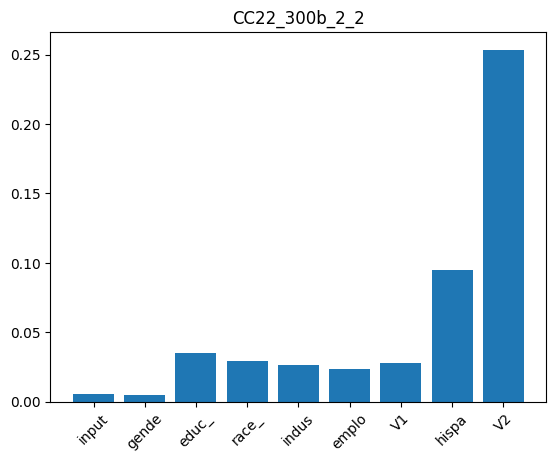

CC22_300b_2_1 0.7626577687509067


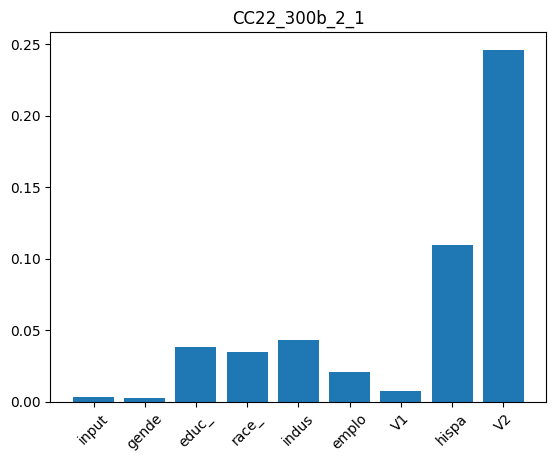

CC22_300b_2_NA 0.6597997968954011


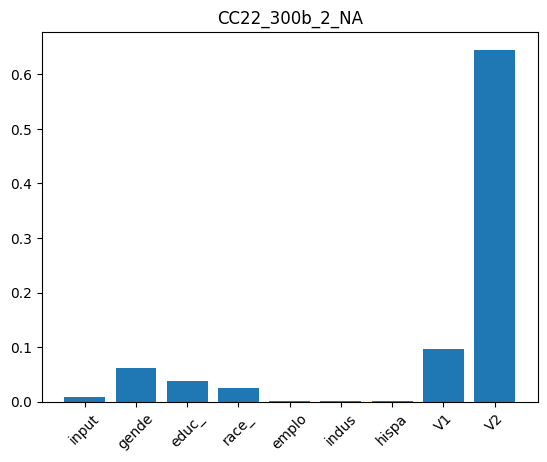

CC22_300b_3_2 0.860655737704918


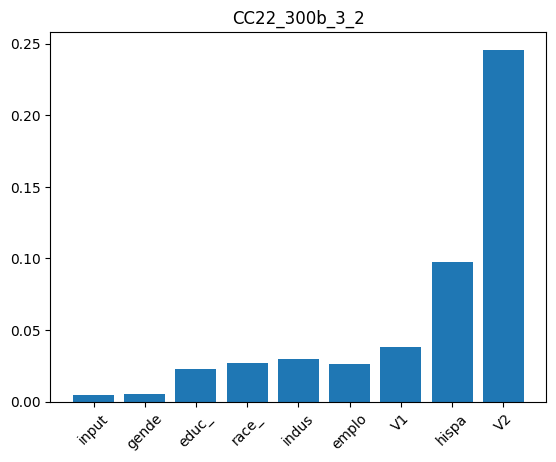

CC22_300b_3_1 0.7695488176410852


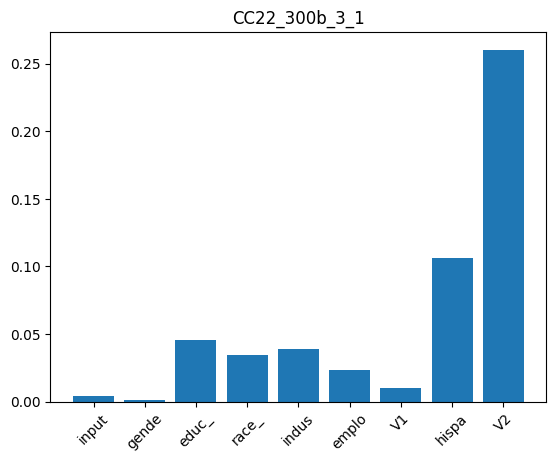

CC22_300b_3_NA 0.6597997968954011


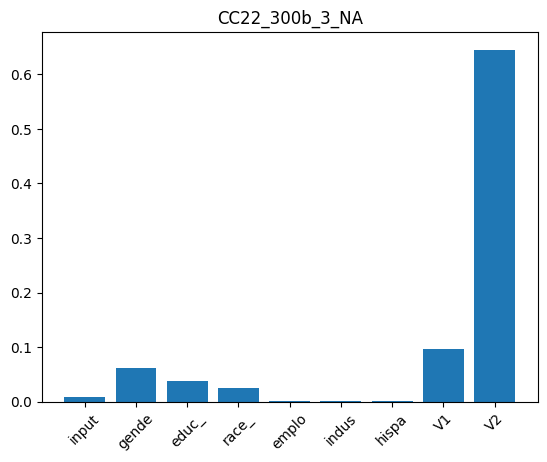

CC22_300b_4_1 0.8685623095894386


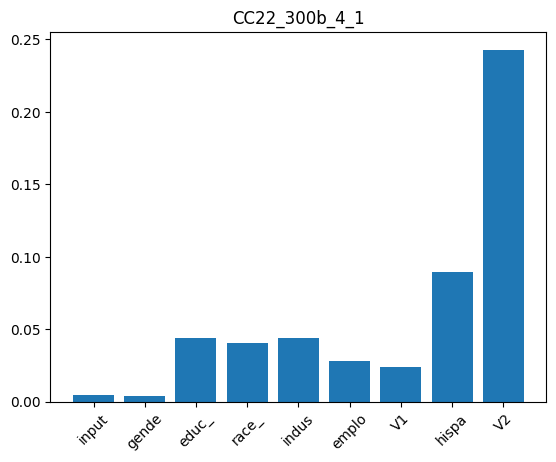

CC22_300b_4_2 0.7614246336863485


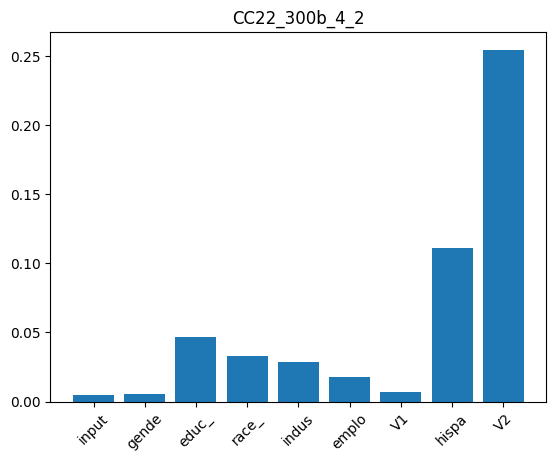

CC22_300b_4_NA 0.6597997968954011


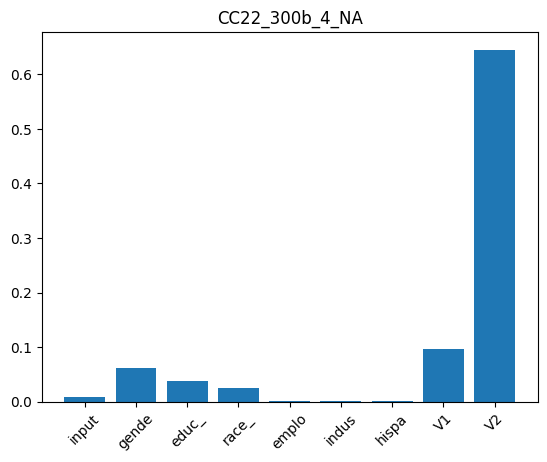

CC22_300b_5_2 0.8538372261714783


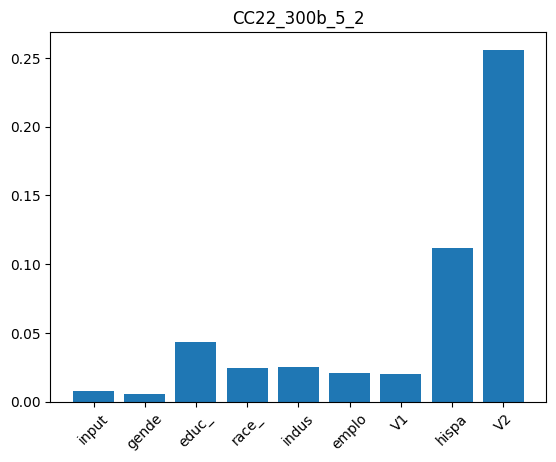

CC22_300b_5_1 0.7763673291745249


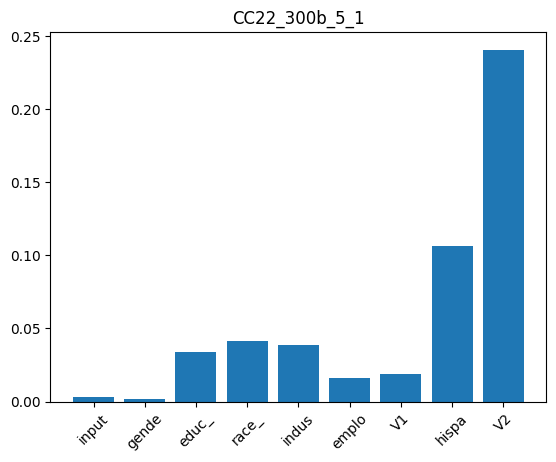

CC22_300b_5_NA 0.6597997968954011


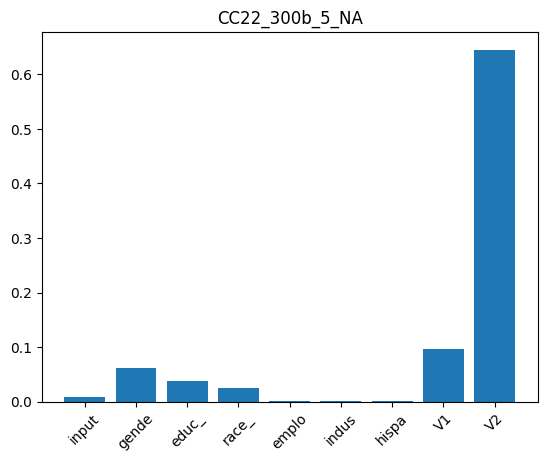

CC22_300b_6_2 0.8938053097345132


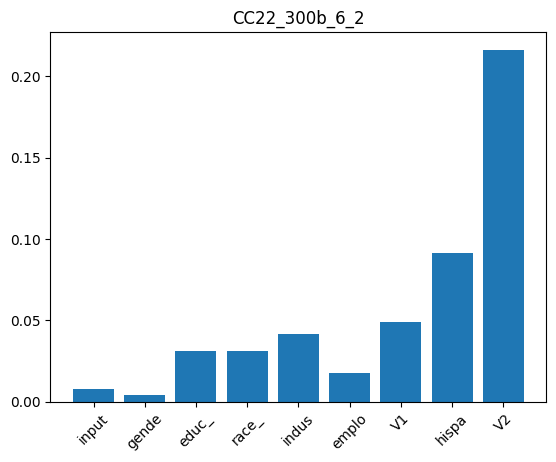

CC22_300b_6_1 0.7368344697519222


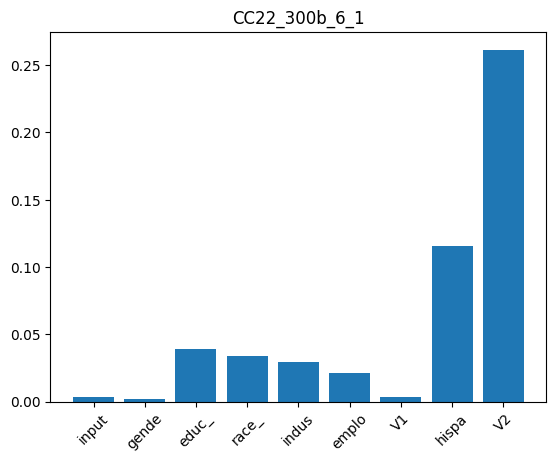

CC22_300b_6_NA 0.6597997968954011


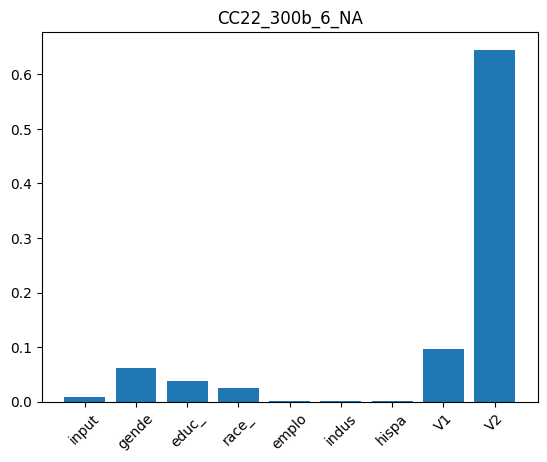

CC22_300b_7_2 0.9420426519657623


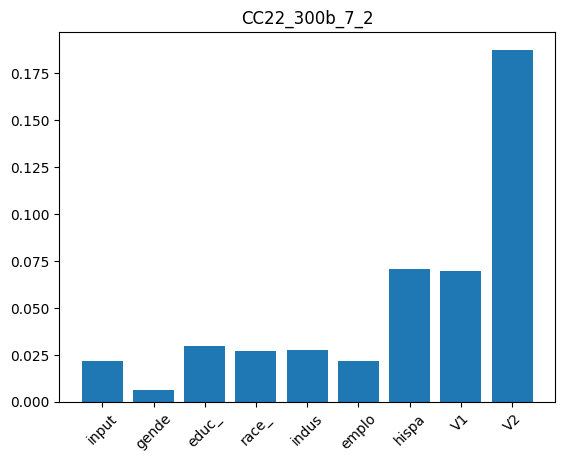

CC22_300b_7_1 0.6888872769476281


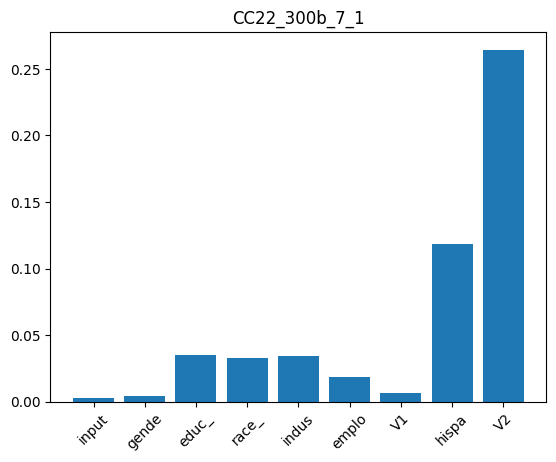

CC22_300b_7_NA 0.6597997968954011


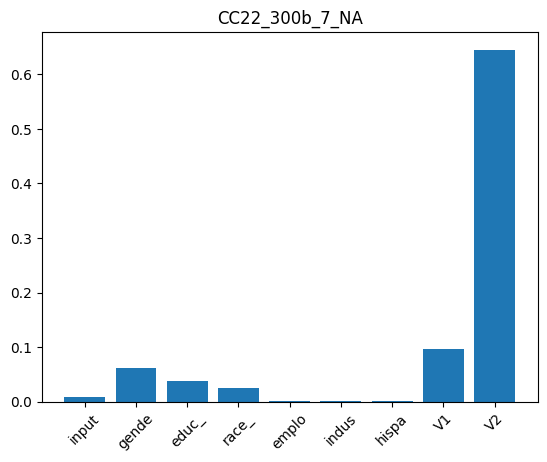

CC22_300b_8_2 0.9575656463078486


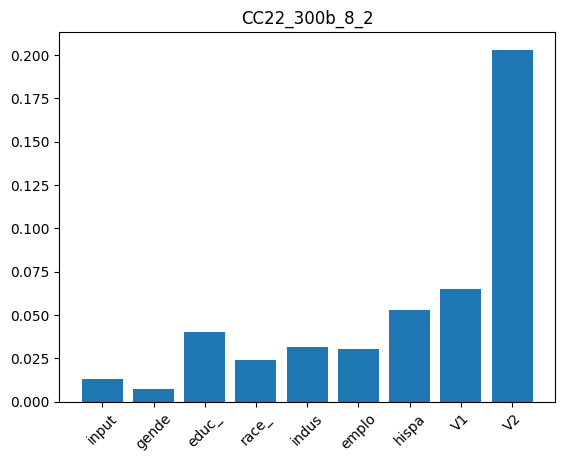

CC22_300b_8_1 0.673872044102713


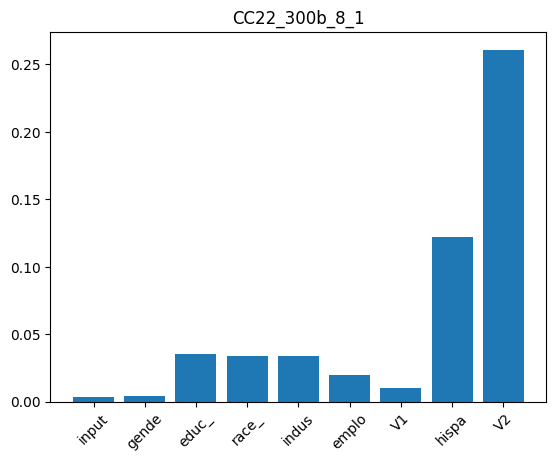

CC22_300b_8_NA 0.6597997968954011


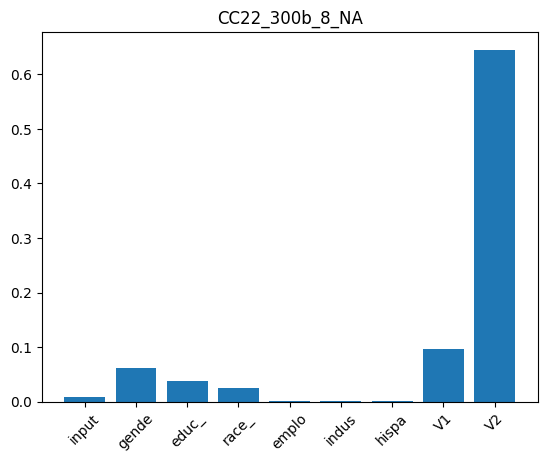

In [ ]:
import json

filed = 'complete.json'
with open(path+filed) as train_file:
    dict_train = json.load(train_file)
print("Type:", type(dict_train))
# converting json dataset from dictionary to dataframe

data = pd.DataFrame(dict_train)

from sklearn.ensemble import GradientBoostingClassifier

# data = pd.read_csv(path+"CES_indicator.csv")
interest = []
for item in data:
  if "CC22_300b" in item:
    interest.append(item)

features = []
for item in data:
  if "CC22_300" not in item and item != "Unnamed: 0":
    features.append(item)

x_values = features

X = data[x_values].values
y_values = interest

for i in range(len(y_values)):
  y = data[y_values[i]].values

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.25, random_state=42
      )

  clf = GradientBoostingClassifier(
      random_state=123
  ).fit(X_train, y_train)

  print(y_values[i], clf.score(X_test, y_test))

  new_features = []
  new_importance = []
  current = ""
  count = -1

  for m in range(len(x_values)):
    if x_values[i][0:5] != current:
      count += 1
      new_features.append(x_values[m][0:5])
      new_importance.append(clf.feature_importances_[m])
    else:
      new_importance[count] += clf.feafture_importances_[m]

  paired_arrays = list(zip(new_importance, new_features))

  # Sort the paired elements based on the elements of the first array
  sorted_pairs = sorted(paired_arrays, key=lambda x: x[0])

  # Unzip the sorted pairs back into two separate arrays
  sorted_features, sorted_x = zip(*sorted_pairs)

  plt.bar(sorted_x, sorted_features)
  plt.title(y_values[i])
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_dict = {}

data = pd.read_csv(path+"CES_indicator_300bunsplit.csv")
interest = []
for item in data:
  if "CC22_300b" in item:
    interest.append(item)

x_values = features

X = data[x_values].values
y_values = interest


for i in range(len(y_values)):
  y = data[y_values[i]].values

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.25, random_state=42
      )


# Initialize the RandomForestClassifier
  model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model for each target variable
# for target in targets:

  print(f'Training model for {y_values[i]}')
  model_random_forest.fit(X_train, y_train)
  predictions = model_random_forest.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, predictions)
  print(f'Accuracy for {y_values[i]}: {accuracy:.2f}')
  print(classification_report(y_test, predictions))

  importances = model_random_forest.feature_importances_
  for feature, importance in zip(features.columns, importances):
      feature_importances_dict[feature] += importance

# Average feature importances over all target variables
feature_importances = pd.DataFrame.from_dict(feature_importances_dict, orient='index', columns=['importance'])
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Aggregated Feature Importances in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Training model for CC22_300b_1
Accuracy for CC22_300b_1: 0.62
              precision    recall  f1-score   support

         0.0       0.65      0.86      0.74      2688
         1.0       0.48      0.21      0.30      1613

    accuracy                           0.62      4301
   macro avg       0.56      0.54      0.52      4301
weighted avg       0.58      0.62      0.57      4301



AttributeError: 'list' object has no attribute 'columns'